In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import rc
from scipy.signal import find_peaks 
from cProfile import label
import scipy.interpolate as scint

In [2]:
def energies_in_eV(energy):
    val = energy.values.T
    energy_eV = val*0.0367502
    df = pd.DataFrame(energy_eV.T, index = energy.index, columns = energy.columns)
    return df

In [3]:
MnCl_path = './energy_MnCl+_treated.csv'
MnCl = pd.read_csv(MnCl_path, sep = ';', decimal = ',', index_col = 0)

MnCl2_path = './energy_MnCl2_treated.csv'
MnCl2 = pd.read_csv(MnCl2_path, sep = ';', decimal = ',', index_col = 0)

MnCl3_path = './energy_MnCl3-_treated.csv'
MnCl3 = pd.read_csv(MnCl3_path, sep = ';', decimal = ',', index_col = 0)

MnClH2O_path = './energy_MnClH2O_treated.csv'
MnClH2O = pd.read_csv(MnClH2O_path, sep = ';', decimal = ',', index_col = 0)

MnCl2aq_path = './energy_MnCl2aq_treated.csv'
MnCl2aq = pd.read_csv(MnCl2aq_path, sep = ';', decimal = ',', index_col = 0)

mone_to_ptwo_path = './energy_-1to+2.CSV'
mone_to_ptwo = pd.read_csv(mone_to_ptwo_path, sep = ';', decimal = ',')

mone_to_ponefive_path = './energy_-1to+15.CSV'
mone_to_ponefive = pd.read_csv(mone_to_ponefive_path, sep = ';', decimal = ',')

MnCl2_v2_path = './energy_MnCl2_v2.csv'
MnCl2_v2 = pd.read_csv(MnCl2_v2_path, sep = ';', decimal = ',', index_col = 0)

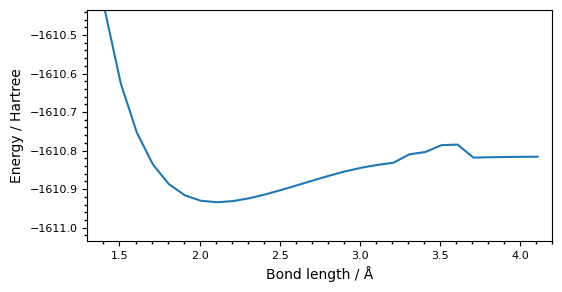

In [15]:
plt.figure(figsize=(6,3))

ax = sns.lineplot(x = mone_to_ptwo['MnCl+ bl'], y = mone_to_ptwo['MnCl+ gse'])
ax.set_ylim(mone_to_ptwo['MnCl+ gse'][10]-0.1, mone_to_ptwo['MnCl+ gse'][3])
ax.set_xlim(1.3, 4.2)
ax.set_xlabel('Bond length / Å')
ax.set_ylabel('Energy / Hartree')

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)

plt.show()

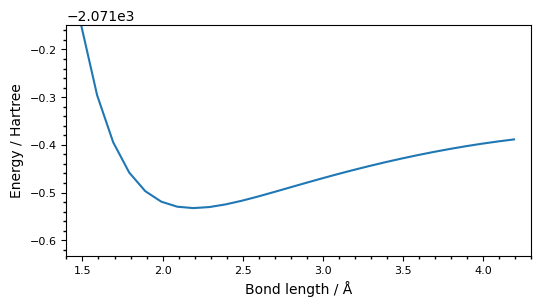

In [17]:
plt.figure(figsize=(6,3))

ax = sns.lineplot(x = mone_to_ptwo['MnCl2 bl'], y = mone_to_ptwo['MnCl2 gse'])
ax.set_ylim(mone_to_ptwo['MnCl2 gse'][10]-0.1, mone_to_ptwo['MnCl2 gse'][3])
ax.set_xlim(1.4, 4.3)
ax.set_xlabel('Bond length / Å')
ax.set_ylabel('Energy / Hartree')

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)

plt.show()

In [4]:
MnCl_eV = energies_in_eV(MnCl)
MnCl2_eV = energies_in_eV(MnCl2)
MnCl3_eV = energies_in_eV(MnCl3)
MnClH2O_eV = energies_in_eV(MnClH2O)
MnCl2aq_eV = energies_in_eV(MnCl2aq)
MnCl2_v2_eV = energies_in_eV(MnCl2_v2)

In [5]:
def make_subplot(axes, dataname, scilimit, displaylabel, bb2a):
    ax = axes
    min_value = 0
    for key in dataname.keys():
        if min_value > np.min(dataname[key].values):
            min_value = np.min(dataname[key].values)
    for i, key in enumerate(dataname.keys()):
        if i == 0:
            ax.plot(dataname.index.values, dataname[key].values, label = displaylabel, lw = 1, color = 'tab:blue')
        else:
            ax.plot(dataname.index.values, dataname[key].values, lw = 1, color = 'tab:blue', linestyle = '--')
    min_value = np.round(min_value,3)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
    ax.ticklabel_format(axis = "y", style = "plain", useOffset = min_value)
    ax.yaxis.offsetText.set_fontsize(9)
    h, l = ax.get_legend_handles_labels()
    ax.legend(handles = h, frameon = False, loc = 4, bbox_to_anchor = bb2a, fontsize = 8, handlelength = 0, handletextpad = 0)
    # print(ax.get_yticklabels())

In [7]:
labels_list = ['Ground state', 'Excited state']
Species_list = [r'MnCl$^{+}$', r'MnCl$_{2}$', r'MnCl$_{3}^{-}$', r'MnCl(H$_{2}$O)$_{5}^{+}$', r'MnCl$_{2}$(H$_{2}$O)$_{4}$']
bond_length_eq = [2.10823, 2.19158, 2.30779, 2.32156, 2.40765]
gse_at_bleq = [-1610.934061, -2071.5326554, -2531.91603661, -1993.34412001, -2377.36866735]
gse_at_bleq = np.array(gse_at_bleq)*0.0367502

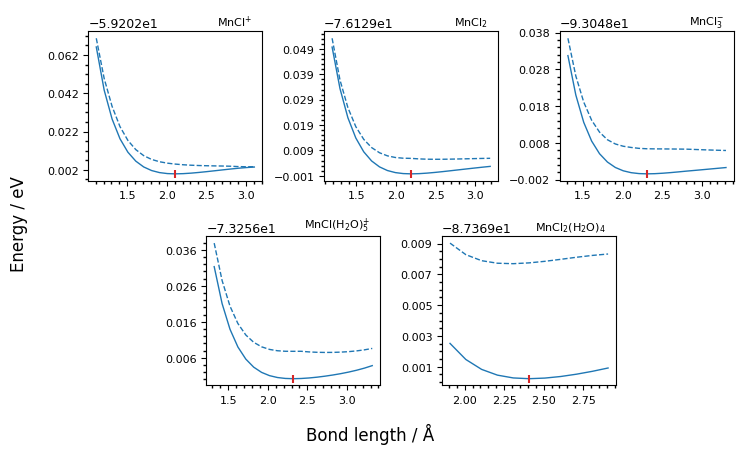

In [7]:
fig = plt.figure(figsize = (7.5, 4.5))
spec = mpl.gridspec.GridSpec(ncols=6, nrows=2) # 6 columns evenly divides both 2 & 3

ax1 = fig.add_subplot(spec[0,0:2]) # row 0 with axes spanning 2 cols on evens
ax2 = fig.add_subplot(spec[0,2:4])
ax3 = fig.add_subplot(spec[0,4:])
ax4 = fig.add_subplot(spec[1,1:3]) # row 0 with axes spanning 2 cols on odds
ax5 = fig.add_subplot(spec[1,3:5])

make_subplot(ax1, MnCl_eV, (-3,-3), Species_list[0], (1,0.95))
ax1.scatter(bond_length_eq[0], gse_at_bleq[0], marker = '|', color = 'tab:red', zorder = 10, label = 'Eq bond length')
ax1.set_ylabel(' ', fontsize = 5)
make_subplot(ax2, MnCl2_eV, (-3,-3), Species_list[1], (1,0.95))
ax2.scatter(bond_length_eq[1], gse_at_bleq[1], marker = '|', color = 'tab:red', zorder = 10, label = 'Eq bond length')
make_subplot(ax3, MnCl3_eV, (-3,-3), Species_list[2], (1,0.95))
ax3.scatter(bond_length_eq[2], gse_at_bleq[2], marker = '|', color = 'tab:red', zorder = 10, label = 'Eq bond length')
make_subplot(ax4, MnClH2O_eV, (-3,-3), Species_list[3], (1,0.95))
ax4.scatter(bond_length_eq[3], gse_at_bleq[3], marker = '|', color = 'tab:red', zorder = 10, label = 'Eq bond length')
make_subplot(ax5, MnCl2aq_eV, (-3,-3), Species_list[4], (1,0.95))
ax5.scatter(bond_length_eq[4], gse_at_bleq[4], marker = '|', color = 'tab:red', zorder = 10, label = 'Eq bond length')

fig.supxlabel('Bond length / Å')
fig.supylabel('Energy / eV')

plt.tight_layout(pad=0.8)
plt.savefig('dissociation.png', dpi=150)
plt.show()

In [5]:
def make_subplot_individual(axes, dataname, displaylabel, n, bb2a):
    ax = axes
    sns.lineplot(data = dataname, ax = ax, lw = 1, color = 'tab:blue')
    ax.scatter(bond_length_eq[n], gse_at_bleq[n], marker = '|', color = 'tab:red', zorder = 10, label = 'Eq bond length')
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
    ax.yaxis.offsetText.set_fontsize(9)
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles = handles, labels = displaylabel, frameon = False, ncol=2, loc = 4, bbox_to_anchor = bb2a, fontsize = 8)

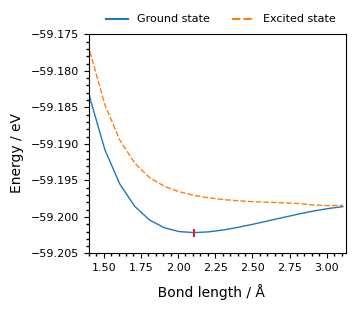

In [9]:
fig, axes = plt.subplots(1,1, figsize=(3.5,3))

make_subplot_individual(axes, MnCl_eV, labels_list, 0, (1,1))
axes.set_xlim(1.4, 3.13)
axes.set_ylim(-59.205, -59.175)

fig.supxlabel('               Bond length / Å', fontsize = 10)
fig.supylabel('Energy / eV', fontsize = 10)

plt.tight_layout(pad=0.5)
plt.savefig('dissociation_MnCl+.png', dpi=150)
plt.show()

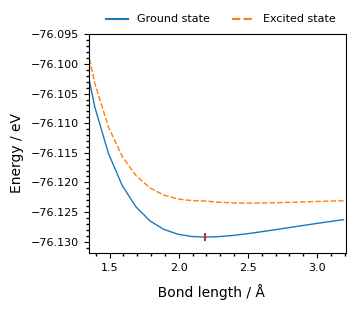

In [10]:
fig, axes = plt.subplots(1,1, figsize=(3.5,3))

make_subplot_individual(axes, MnCl2_eV, labels_list, 1, (1,1))
axes.set_xlim(1.35, 3.21)
axes.set_ylim(-76.132, -76.095)

fig.supxlabel('               Bond length / Å', fontsize = 10)
fig.supylabel('Energy / eV', fontsize = 10)

plt.tight_layout(pad=0.5)
plt.savefig('dissociation_MnCl2.png', dpi=150)
plt.show()

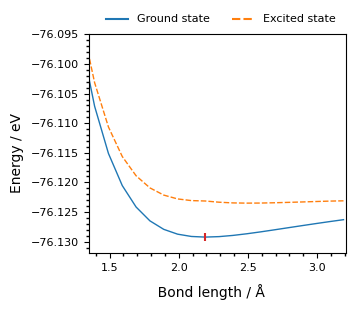

In [8]:
fig, axes = plt.subplots(1,1, figsize=(3.5,3))

make_subplot_individual(axes, MnCl2_v2_eV, labels_list, 1, (1,1))
axes.set_xlim(1.35, 3.21)
axes.set_ylim(-76.132, -76.095)

fig.supxlabel('               Bond length / Å', fontsize = 10)
fig.supylabel('Energy / eV', fontsize = 10)

plt.tight_layout(pad=0.5)
plt.savefig('dissociation_MnCl2_v2.png', dpi=150)
plt.show()

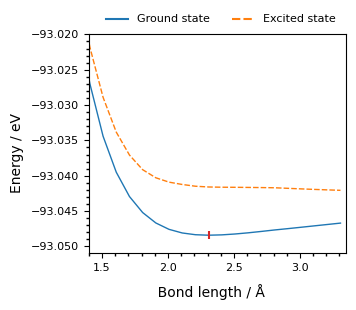

In [11]:
fig, axes = plt.subplots(1,1, figsize=(3.5,3))

make_subplot_individual(axes, MnCl3_eV, labels_list, 2, (1,1))
axes.set_xlim(1.4, 3.35)
axes.set_ylim(-93.051, -93.02)

fig.supxlabel('               Bond length / Å', fontsize = 10)
fig.supylabel('Energy / eV', fontsize = 10)

plt.tight_layout(pad=0.5)
plt.savefig('dissociation_MnCl3-.png', dpi=150)
plt.show()

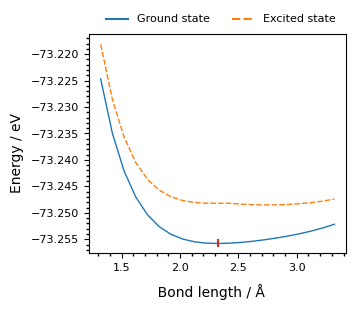

In [12]:
fig, axes = plt.subplots(1,1, figsize=(3.5,3))

make_subplot_individual(axes, MnClH2O_eV, labels_list, 3, (1,1))

fig.supxlabel('               Bond length / Å', fontsize = 10)
fig.supylabel('Energy / eV', fontsize = 10)

plt.tight_layout(pad=0.5)
plt.savefig('dissociation_MnClH2O.png', dpi=150)
plt.show()

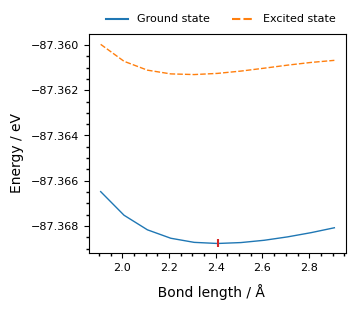

In [13]:
fig, axes = plt.subplots(1,1, figsize=(3.5,3))

make_subplot_individual(axes, MnCl2aq_eV, labels_list, 4, (1,1))

fig.supxlabel('               Bond length / Å', fontsize = 10)
fig.supylabel('Energy / eV', fontsize = 10)

plt.tight_layout(pad=0.5)
plt.savefig('dissociation_MnCl2aq.png', dpi=150)
plt.show()